## Sentiment Analysis (based on customer reviews)

- source of the export_book.csv: https://dataverse.harvard.edu/file.xhtml?fileId=5612736&version=1.0

----------------

#### import libraries

In [80]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
#!python -m spacy download en_core_web_sm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

--------------

#### data preparation

In [3]:
data = pd.read_csv("export_book.csv", delimiter=",")

In [6]:
data.head()

,Unnamed: 0,asin,product name,ratings,reviews,helpful,date,Unnamed: 6,target,text
0,0,1524763136,Becoming,5,\n\n Slow and boring and self boasting.\n\n,"4,100",13-Dec-18,NaN,p,\n\n Slow and boring and self boasting.\n\n
1,1,1524763136,Becoming,5,\n\n The last thing I wanted to read was a sh...,"3,892",11-Dec-18,NaN,p,\n\n The last thing I wanted to read was a sh...
2,2,1524763136,Becoming,1,\n\n I believe I always loved Michelle Obama....,"2,824",13-Nov-18,NaN,n,\n\n I believe I always loved Michelle Obama....
3,3,1524763136,Becoming,1,\n\n Worst piece of crap ever\n\n,"3,182",11-Dec-18,NaN,n,\n\n Worst piece of crap ever\n\n
4,4,1524763136,Becoming,1,\n\n If you are an insomniac this book will d...,"2,838",11-Dec-18,NaN,n,\n\n If you are an insomniac this book will d...


In [8]:
data["target"].value_counts()

target
p    4323
n     677
Name: count, dtype: int64

In [10]:
data = data.drop(['Unnamed: 6', 'text'], axis=1)

In [12]:
data = data.rename(columns={"Unnamed: 0": "index"})

In [14]:
data.head()

,index,asin,product name,ratings,reviews,helpful,date,target
0,0,1524763136,Becoming,5,\n\n Slow and boring and self boasting.\n\n,"4,100",13-Dec-18,p
1,1,1524763136,Becoming,5,\n\n The last thing I wanted to read was a sh...,"3,892",11-Dec-18,p
2,2,1524763136,Becoming,1,\n\n I believe I always loved Michelle Obama....,"2,824",13-Nov-18,n
3,3,1524763136,Becoming,1,\n\n Worst piece of crap ever\n\n,"3,182",11-Dec-18,n
4,4,1524763136,Becoming,1,\n\n If you are an insomniac this book will d...,"2,838",11-Dec-18,n


In [37]:
#transform the sentences of the reviews to a list
review_sent = data['reviews'].values.tolist()
print(review_sent[:5])

#clean the list with the reviews from \n
reviews = review_sent

['\n\n  Slow and boring and self boasting.\n\n', '\n\n  The last thing I wanted to read was a shallow minded patting on the back. I thought with the education, the time would be well spent. I was wrong.\n\n', '\n\n  I believe I always loved Michelle Obama.  Her grace and dignity always seemed to come as a gift from above.  Her spirit is so incredibly deep and strong.  The stories from her childhood, her brother, her neighborhood, her family, inform us in a brilliant voice about what it was like in the place and time she grew up.Michelle Obama has the empathy and the depth of character so missing in her media portrayal.  I always felt worried that we were suffocating her.  But there is a Michelle Obama who is bigger than the words on a page.  She knows our pains, and she understands our lives.  And we know her in this book.  In this most private book, we know her in a way we could not have otherwise.  Interesting that nothing here surprises me, it only affirms what I felt like I know:  

In [39]:
#define the target values as 0 (negative review) and 1 (positive review)

# Initialisiere den LabelEncoder
le = LabelEncoder()

# Wende den Encoder auf die Spalte an
data['target'] = le.fit_transform(data['target'])

data.head()

,index,asin,product name,ratings,reviews,helpful,date,target
0,0,1524763136,Becoming,5,\n\n Slow and boring and self boasting.\n\n,"4,100",13-Dec-18,1
1,1,1524763136,Becoming,5,\n\n The last thing I wanted to read was a sh...,"3,892",11-Dec-18,1
2,2,1524763136,Becoming,1,\n\n I believe I always loved Michelle Obama....,"2,824",13-Nov-18,0
3,3,1524763136,Becoming,1,\n\n Worst piece of crap ever\n\n,"3,182",11-Dec-18,0
4,4,1524763136,Becoming,1,\n\n If you are an insomniac this book will d...,"2,838",11-Dec-18,0


In [41]:
#transform the target values to a list
target = data['target'].values.tolist()
print(target[:5])

[1, 1, 0, 0, 0]


--------------

#### make a prediction on the reviews

In [54]:
#load spacy (english)
nlp = spacy.load("en_core_web_sm")

#load reviews and sentiment labels
texts = reviews
labels = target

#lemmatize the reviews
lemmatized_texts = [" ".join([token.lemma_ for token in nlp(text)]) for text in texts]

#feature extraction: transform text to vector
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmatized_texts)

#train the modell using naive bayes for text classification
model = MultinomialNB()
model.fit(X, labels)

prediction: positive


In [68]:
accuracy = model.score(X, labels)
print("Accuracy:", accuracy)

Accuracy: 0.8868


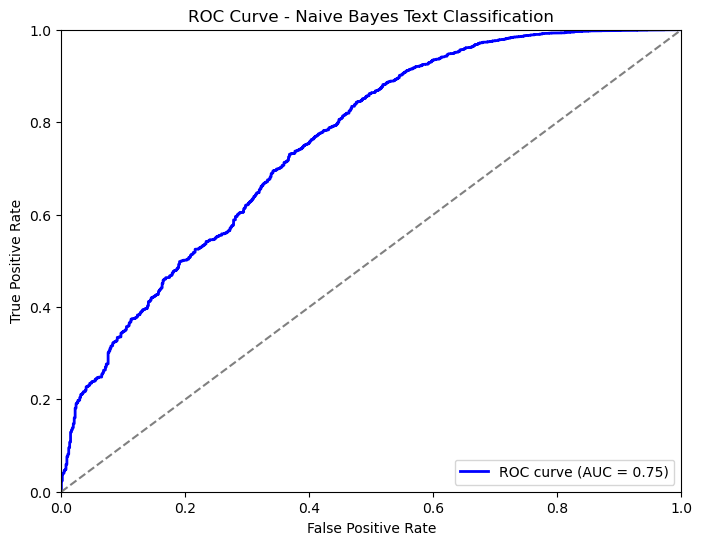

In [74]:
#check probabilities
y_probs = model.predict_proba(X)[:, 1]  

#calc roc curve
fpr, tpr, _ = roc_curve(labels, y_probs)
roc_auc = auc(fpr, tpr)

#plot roc curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  #diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes Text Classification')
plt.legend(loc="lower right")
plt.show()

short overview confusion matrix
 [[ 143  534]
 [  32 4291]]

Confusion Matrix:


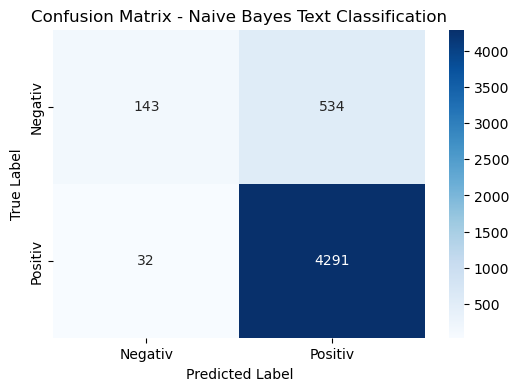

In [90]:
#model prediction
y_pred = model.predict(X)

#calculate confusion matrix
cm = confusion_matrix(labels, y_pred)
print(f'short overview confusion matrix\n {cm}\n')

#plot heat map
print("confusion matrix (visualized):")
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Naive Bayes Text Classification")
plt.show()

In [ ]:
#enter an example text for your own classification based on the reviews
test_text = input("Enter a short review textx")
lemmatized_test_text = " ".join([token.lemma_ for token in nlp(test_text[0])])  #lemmatization of the example text
X_test = vectorizer.transform([lemmatized_test_text])
prediction = model.predict(X_test)

#result (positive or negative)
print("prediction:", "positive" if prediction[0] == 1 else "negative")